## THE SPARKS FOUNDATION - DATA SCIENCE & BUSINESS ANALYTICS INTERSHIP

### TASK 1 -Prediction using Supervised Machine Learning

##### Author : SMRUNAL PORE 

In [17]:
#Importing the important liabraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style("darkgrid")

### LOADING THE DATASET

In [3]:
#Reading the dataset
link= 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(link)

In [6]:
#Lets look at the top 5 values
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
#Lets find out the number of columns and rows
df.shape

(25, 2)

In [12]:
#Look into the Statistical information
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
#Cheking the data type
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [16]:
#Looking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### DATA VISUALIZATION

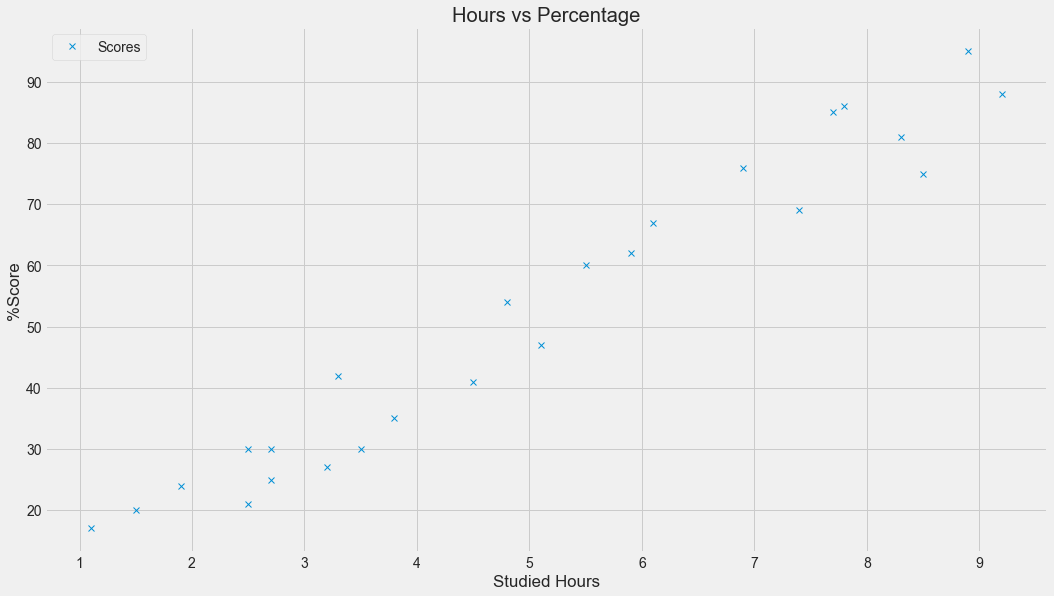

In [47]:
#Lets plot the Dataset
df.plot(x="Hours", y="Scores", style='x',figsize=(16,9))
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('%Score')
plt.show()

In [48]:
#From the above figure we observe that there's a linear relation between the % of score and the Studied Hours.

In [24]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### TRAIN TEST SPLIT

In [26]:
from sklearn.model_selection import train_test_split 
# Doing a train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### MODEL BUILDING 

In [27]:

from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

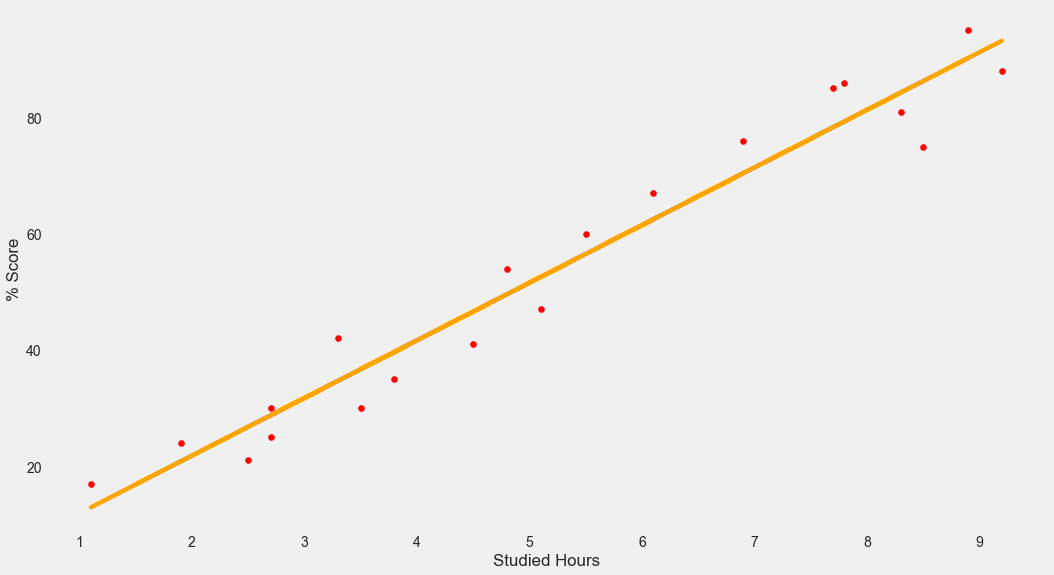

In [33]:
# For Plotting the Regression Line
res_line = model.coef_*X + model.intercept_
#Plotting the test data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train, color='red')
plt.plot(X, res_line, color='orange');
plt.xlabel('Studied Hours')  
plt.ylabel('% Score') 
plt.grid()
plt.show()


In [34]:
print(X_test) 
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [49]:
#Lets Compare the Actual Marks vs The Predicted Marks in Tablular Form
scores_compared=pd.DataFrame({'Actual Marks':y_test,'Predicted Marks':y_pred})
scores_compared

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("If a Student Studies for",hours,"hours  his predicted Score is ",own_pred[0])

If a Student Studies for 9.25 hours  his predicted Score is  93.69173248737538


### MODEL EVALUATION

In [50]:
#Lets Import The Required Library for the Model Evaluation
from sklearn import metrics  

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R2: 0.9454906892105356


#### If a Student Studies fo 9.25 hours/day his Predicted Score is 93.69173248737538